In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# df = pd.read_csv(os.path.expanduser('~/Data/Bilingualism_CVAE/raw/ping/participants.tsv'), sep="\t")
image = pd.read_csv(os.path.expanduser('~/Ping/image03.txt'), sep="\t")
data = pd.read_csv(os.path.expanduser('~/Ping/fdh01.txt'), sep="\t")
#refer to https://nda.nih.gov/data_structure.html?short_name=fdh01
image['scanner_type_pd'].value_counts(dropna=False)

TrioTim                1884
Achieva                 998
DISCOVERY MR750         543
SIGNA HDx               431
Equipment Type/name       1
Name: scanner_type_pd, dtype: int64

In [3]:
image

collection_id  image03_id  dataset_id  \
0     collection_id  image03_id  dataset_id   
1              2607     1665100       17149   
2              2607     1665101       17149   
3              2607     1665102       17149   
4              2607     1665103       17149   
...             ...         ...         ...   
3852           2607     1667027       17155   
3853           2607     1667028       17155   
3854           2607     1667029       17155   
3855           2607     1667030       17155   
3856           2607     1667031       17155   

                                             subjectkey  \
0     The NDAR Global Unique Identifier (GUID) for r...   
1                                      NDAR_INV8J9E98PE   
2                                      NDAR_INV2W9ZVNMW   
3                                      NDAR_INVG0GL0FNJ   
4                                      NDAR_INVJFVP8H6H   
...                                                 ...   
3852                                   NDAR_INVUCUMRTJM   
3853                                   NDAR_INV9EUY202W   
3854                                   NDAR_INVXZF8Y413   
3855                                   NDAR_INV90JTKNHX   
3856                                   NDAR_INV07T9ACEG   

                                  src_subject_id  \
0     Subject ID how it's defined in lab/project   
1                                          P0301   
2                                          P0302   
3                                          P0303   
4                                          P0310   
...                                          ...   
3852                                       P0332   
3853                                       P0348   
3854                                       P0358   
3855                                       P0360   
3856                                       P0367   

                                         interview_date  \
0     Date on which the interview/genetic test/sampl...   
1                                            01/01/2011   
2                                            01/01/2011   
3                                            01/01/2011   
4                                            01/01/2011   
...                                                 ...   
3852                                         01/01/2011   
3853                                         01/01/2011   
3854                                         01/01/2011   
3855                                         01/01/2011   
3856                                         01/01/2011   

                                          interview_age  \
0     Age in months at the time of the interview/tes...   
1                                                   141   
2                                                   249   
3                                                   233   
4                                                   196   
...                                                 ...   
3852                                                121   
3853                                                128   
3854                                                222   
3855                                                 82   
3856                                                207   

                          sex  \
0     Sex of subject at birth   
1                           M   
2                           F   
3                           F   
4                           M   
...                       ...   
3852                        F   
3853                        F   
3854                        M   
3855                        M   
3856                        M   

                                          comments_misc  \
0     Miscellaneous comments on study, interview, me...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN 

In [4]:
image.columns[0:50]
image.scan_type.value_counts()

MR structural (T1)        783
MR diffusion              761
MR structural (T2)        735
Localizer scan            706
fMRI                      461
MR structural (B0 map)    410
Type of Scan                1
Name: scan_type, dtype: int64

In [5]:
#check the same subjects have multiple T1 results
subs = image[image.scan_type == 'MR structural (T1)']['src_subject_id'].value_counts()
subs_index = subs[subs==2].index
subs_index = subs_index.tolist()

In [6]:
len(subs_index) #22 duplicates

22

In [7]:
dup = image[(image.src_subject_id.isin(subs_index)) & (image.scan_type == 'MR structural (T1)')][['src_subject_id', 'scanner_type_pd']]
#all T1 here are TrioTim, except P0008, couldn't decide the scanner of P0008, so use NA instead. 

In [8]:
data = data.iloc[1:, :]
len(data)

1493

In [9]:
#ds, participant_id, bilingualism(0-no, 1-yes)
#age, sex(F,M), scanner
#aoa/aoa_group(EB, LB), num_lan, sec_lan_proficiency(0-1), sec_lan_exposure(0-1)

In [10]:
scanner = image[(image.scan_type == 'MR structural (T1)')].loc[:, ['src_subject_id', 'scanner_type_pd']]
scanner.loc[scanner.src_subject_id=='P0008', 'scanner_type_pd'] = None
scanner = scanner.drop_duplicates(keep='first') #from 783 to 761, 22 removed 

In [11]:
data = data.merge(scanner, how='left', on='src_subject_id')

In [12]:
data = data.copy()
data.loc[:, 'participant_id'] = 'sub-'+data.loc[:, 'src_subject_id']

In [13]:
data.loc[:, 'scanner'] = data.loc[:, 'scanner_type_pd']

In [14]:
data.loc[:, 'bilingualism'] = data.loc[:, 'fdh_22_speaks_othr_lang']
data.loc[data['bilingualism']=='2','bilingualism']=0
data.loc[data['bilingualism']=='1','bilingualism']=1

In [15]:
data.loc[:, 'age'] = data.loc[:, 'interview_age'].astype(float)/12
#data['age'].mean() is 11.34

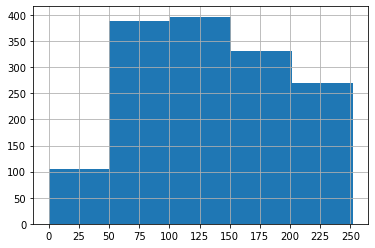

In [25]:
data['interview_age'].astype(float).hist(bins=5).set_xticks([0, 25, 50,75,100,125,150,175,200,225,250])

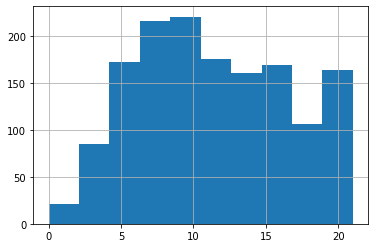

In [26]:
data.age.describe()
data.age.hist()

In [16]:
data.loc[:, 'ds'] = 'ping'

In [31]:
legend = data.loc[:, ['participant_id', 'bilingualism', 'age', 'sex', 
              'ds', 'scanner']]

In [33]:
legend.to_csv(
    os.path.expanduser('~/Documents/Bilingualism_CVAE/data/legend/ping.csv'),
    index = False)